In [1]:
batch3_aa = read.csv("AA_3rd_batch_final20190227.csv")
colnames(batch3_aa) = batch3_aa[1,]
batch3_aa = batch3_aa[-c(1),]
rownames(batch3_aa) = batch3_aa[,1]
batch3_aa = batch3_aa[,-c(1)]
# Fix the data format, rowname and colname
batch3_lipid = read.csv('lipids_3rd_batch_final 20190227.csv')
batch3_lipid = batch3_lipid[-c(2:14),]
colnames(batch3_lipid) = batch3_lipid[1,]
batch3_lipid = batch3_lipid[-c(1),]
rownames(batch3_lipid) = batch3_lipid[,1]
batch3_lipid = batch3_lipid[,-c(1)]
batch3_untar = read.csv('Untargeted_B3.csv')
rownames(batch3_untar) = batch3_untar[,1]
batch3_untar = batch3_untar[,-c(1)]
dim(batch3_aa)
dim(batch3_lipid)
dim(batch3_untar)
merged_batch3 = merge(batch3_aa, batch3_lipid, by = 'row.names')
# Only keep the rows with the same row name and combine the columns
# Merge can only merge 3 dataframes at the same time
rownames(merged_batch3) = merged_batch3$Row.names
merged_batch3 = merged_batch3[,-c(1)]
# Delete the redundant rowname column
merged_batch3 = merge(merged_batch3,batch3_untar, by = 'row.names')
rownames(merged_batch3) = merged_batch3$Row.names
merged_batch3 = merged_batch3[,-c(1)]
dim(merged_batch3)
# Correct dimension should be 30 259 
# Merged batch 3 was corrected due to different data version

,Histidine,isoleucine,Proline,Tryptophan,N-Acetyl-l-ornithine
,<chr>,<chr>,<chr>,<chr>,<chr>
MT100,199.5214545,329.976084,220.6015594,186.0449429,10.66143221
MT101,170.5131617,340.0960639,157.1215742,197.1850821,10.21604782
MT102,226.8144383,396.1206227,310.9568648,209.4854052,12.39572149
MT103,325.6764327,332.9902845,204.61153,215.2283662,13.4115592
MT104,119.8744238,328.0224826,264.8284699,175.2966251,7.762612135


,C10,C10:1,C10:2,C12,C12:1
,<chr>,<chr>,<chr>,<chr>,<chr>
MT100,3.487717086,7.396418785,5.38380947,4.66393533,5.099656043
MT101,3.272812472,3.962517161,5.187564604,2.176516924,6.051601605
MT102,1.711097989,2.59804402,2.87343601,2.049656873,4.160477977
MT103,1.962029458,5.273006144,5.290189357,1.896116725,8.17654506
MT104,1.995360227,4.484989443,5.356643427,1.627367318,8.882823201


,X1.5.Anhydrosorbitol,X2.Hydroxy.3.methylbutyric.acid,X2.Hydroxybutyric.acid,X2.Hydroxypyridine,X2.Phenylglycine
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT100,232.4447,50.376858,20.23757,178.90520,1.936107
MT101,193.1995,19.362223,12.69819,78.85029,5.098673
MT102,327.5160,2.052467,16.17661,101.22388,5.322367
MT103,438.2202,19.946243,45.27547,215.26278,7.343324
MT104,769.2330,5.896177,33.82637,1078.44110,87.309961


[1] 30 11

[1]  30 140

[1]  30 108

[1]  30 259

In [3]:
rename_df = read.csv("/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/common_batch123_renaming_ref.csv")
dim(rename_df)
# Change the name
merged_batch3 = merged_batch3[,rename_df$batch3]
# Sort the merged_batch3 in the order of the rename file
colnames(merged_batch3) = rename_df$rename
# Do the renaming of the merged batch3
merged_batch3[1:5,]
dim(merged_batch3)
#Correct dimension should be 30 185

[1] 185   6

,Alpha.Lactose,Arachidonic.acid,Benzoic.acid,Beta.Alanine,C10,C10:1,C10:2,C12,C12-DC,C12:1,⋯,Stearic.acid,Taurine,Tryptophan,Uric.acid,X1.5.Anhydrosorbitol,X2.Hydroxy.3.methylbutyric.acid,X2.Hydroxybutyric.acid,X2.Hydroxypyridine,X3.hydroxypyridine,X3.Methyl.2.oxovaleric.acid
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT100,3.146483,1.360732,26.09497,0.4054309,3.487717086,7.396418785,5.38380947,4.66393533,1.39652234,5.099656043,⋯,271.2897,52.68544,186.0449429,102.40981,232.4447,50.376858,20.23757,178.90520,5.313521,6.366115
MT101,3.146483,2.439769,17.15812,0.4859209,3.272812472,3.962517161,5.187564604,2.176516924,0,6.051601605,⋯,345.2460,32.48397,197.1850821,137.45265,193.1995,19.362223,12.69819,78.85029,4.235719,3.780005
MT102,2.982544,1.351183,31.08815,0.4412043,1.711097989,2.59804402,2.87343601,2.049656873,0,4.160477977,⋯,213.7222,53.65511,209.4854052,85.14255,327.5160,2.052467,16.17661,101.22388,5.040926,5.287247
MT103,3.859763,1.833407,30.91323,0.2086777,1.962029458,5.273006144,5.290189357,1.896116725,0,8.17654506,⋯,581.5029,65.45277,215.2283662,240.47861,438.2202,19.946243,45.27547,215.26278,7.884309,5.005630
MT104,6.341860,2.921993,47.75331,0.9599174,1.995360227,4.484989443,5.356643427,1.627367318,1.015465786,8.882823201,⋯,331.3822,41.97866,175.2966251,180.02008,769.2330,5.896177,33.82637,1078.44110,7.787852,7.381520


[1]  30 185

In [4]:
merged_batch3[]<-lapply(merged_batch3,function(x) as.double(as.character(x)))
str(merged_batch3)        
# Change all the metabolite type into double so that the NA can be calculated

'data.frame':	30 obs. of  185 variables:
 $ Alpha.Lactose                  : num  3.15 3.15 2.98 3.86 6.34 ...
 $ Arachidonic.acid               : num  1.36 2.44 1.35 1.83 2.92 ...
 $ Benzoic.acid                   : num  26.1 17.2 31.1 30.9 47.8 ...
 $ Beta.Alanine                   : num  0.405 0.486 0.441 0.209 0.96 ...
 $ C10                            : num  3.49 3.27 1.71 1.96 2 ...
 $ C10:1                          : num  7.4 3.96 2.6 5.27 4.48 ...
 $ C10:2                          : num  5.38 5.19 2.87 5.29 5.36 ...
 $ C12                            : num  4.66 2.18 2.05 1.9 1.63 ...
 $ C12-DC                         : num  1.4 0 0 0 1.02 ...
 $ C12:1                          : num  5.1 6.05 4.16 8.18 8.88 ...
 $ C14                            : num  16.9 0 NA 11.3 14.6 ...
 $ C14:1                          : num  7.63 10.99 NA 9.13 8.02 ...
 $ C14:1-OH                       : num  7.02 5.81 NA 3.6 5.98 ...
 $ C14:2                          : num  11.55 11.57 NA 8.48 7.48 ...
 

In [5]:
merged_batch12=readRDS('/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/metabolomics_data_merged_batch12_raw_combined2018.rds')

In [6]:
merged123 = rbind(merged_batch12, merged_batch3)
merged123[1:5,1:5]
dim(merged123)

,Alpha.Lactose,Arachidonic.acid,Benzoic.acid,Beta.Alanine,C10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT12,10.571429,6.261905,268.85714,4.666667,0.3826790
MT13,0.000000,8.283333,30.21667,4.583333,NA
MT15,11.171429,10.028571,247.00000,8.114286,4.5152363
MT16,4.980392,8.029412,100.88235,7.156863,0.8644403
MT18,10.872340,3.723404,158.25532,14.425532,3.8847311


[1]  87 185

In [8]:
merged123 = merged123[,rename_df$rename]
colnames(merged123) = rename_df$clean
str(merged123)

'data.frame':	87 obs. of  185 variables:
 $ AlphaLactose               : num  10.57 0 11.17 4.98 10.87 ...
 $ Arachidonicacid            : num  6.26 8.28 10.03 8.03 3.72 ...
 $ Benzoicacid                : num  268.9 30.2 247 100.9 158.3 ...
 $ BetaAlanine                : num  4.67 4.58 8.11 7.16 14.43 ...
 $ C10                        : num  0.383 NA 4.515 0.864 3.885 ...
 $ C10_1                      : num  0.157 NA 1.127 0.239 0.315 ...
 $ C10_2                      : num  0.172 NA 0.498 0.359 0.331 ...
 $ C12                        : num  0.0581 NA 0.634 0.0856 0.1872 ...
 $ C12_DC                     : num  0 NA 0.253 0.02 0.065 ...
 $ C12_1                      : num  0.151 NA 1.005 0.18 0.47 ...
 $ C14                        : num  0.274 0.358 NA NA 0.39 ...
 $ C14_1                      : num  0.301 0.266 NA NA 0.352 ...
 $ C14_1_OH                   : num  0.184 0.276 NA NA 0.183 ...
 $ C14_2                      : num  0.275 0.427 NA NA 0.347 ...
 $ C14_2_OH                 

In [ ]:
# Unimputed data is ready, named merged123

In [9]:
# Run the R code to get the imputated data (imputed_val.csv)

In [11]:
library(mice)
library(ggfortify)
library(sva)
library("vsn")
library(mdatools)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Loading required package: mgcv

Warning message:
“package ‘mgcv’ was built under R version 4.3.2”
Loading required package: nlme

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.

Loading required package: genefilter

Loading required package: BiocParallel

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:mice’:

    cbind, rbind


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filt

In [10]:
merged123_imp<-read.csv('imputed123_val.csv')
rownames(merged123_imp)<-merged123_imp[,1]
merged123_imp<-merged123_imp[,-1]
merged123_imp[1:5,1:5]

,AlphaLactose,Arachidonicacid,Benzoicacid,BetaAlanine,C10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT12,10.571429,6.261905,268.85714,4.666667,0.3826790
MT13,0.000000,8.283333,30.21667,4.583333,0.3826790
MT15,11.171429,10.028571,247.00000,8.114286,4.5152363
MT16,4.980392,8.029412,100.88235,7.156863,0.8644403
MT18,10.872340,3.723404,158.25532,14.425532,3.8847311


In [12]:
dim(merged123_imp)
sum(complete.cases(merged123_imp))
#Correct 87 185; 87

[1]  87 185

[1] 87

In [21]:
meta_pd = read.csv("/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/3batch_clinical_combined.csv")
rownames(meta_pd) = meta_pd$ID
meta_pd<-meta_pd[rownames(merged123_imp),]

In [23]:
rownames(meta_pd)

[1] "MT12"     "MT13"     "MT15"     "MT16"     "MT18"     "MT19"    
 [7] "MT20"     "MT22"     "MT23"     "MT24"     "MT25"     "MT26"    
[13] "MT27"     "MT28"     "MT29"     "MT30"     "MT31"     "MT32"    
[19] "MT33"     "MT34"     "MT35"     "MT36"     "MT38"     "MT39"    
[25] "MT40"     "MT41"     "MT42"     "MT43"     "MT44"     "MT45"    
[31] "MT49"     "MT50"     "MT51"     "MT52"     "MT53"     "MT54"    
[37] "MT55"     "MT56"     "MT57"     "MT58"     "MT59"     "MT60"    
[43] "MT61"     "MT62"     "MT63"     "MT64"     "MT65"     "MT66"    
[49] "MT67"     "MT68"     "MT69"     "MT73"     "MT74"     "MT75"    
[55] "MT76"     "MT77"     "MT78"     "MT100"    "MT101"    "MT102"   
[61] "MT103"    "MT104"    "MT105"    "MT106"    "MT107"    "MT110"   
[67] "MT111"    "MT65_rep" "MT70"     "MT71"     "MT72"     "MT79"    
[73] "MT80"     "MT81"     "MT82"     "MT83"     "MT84"     "MT85"    
[79] "MT86"     "MT87"     "MT88"     "MT89"     "MT90"     "MT91"    
[85] "MT92"     "MT93"     "MT94"

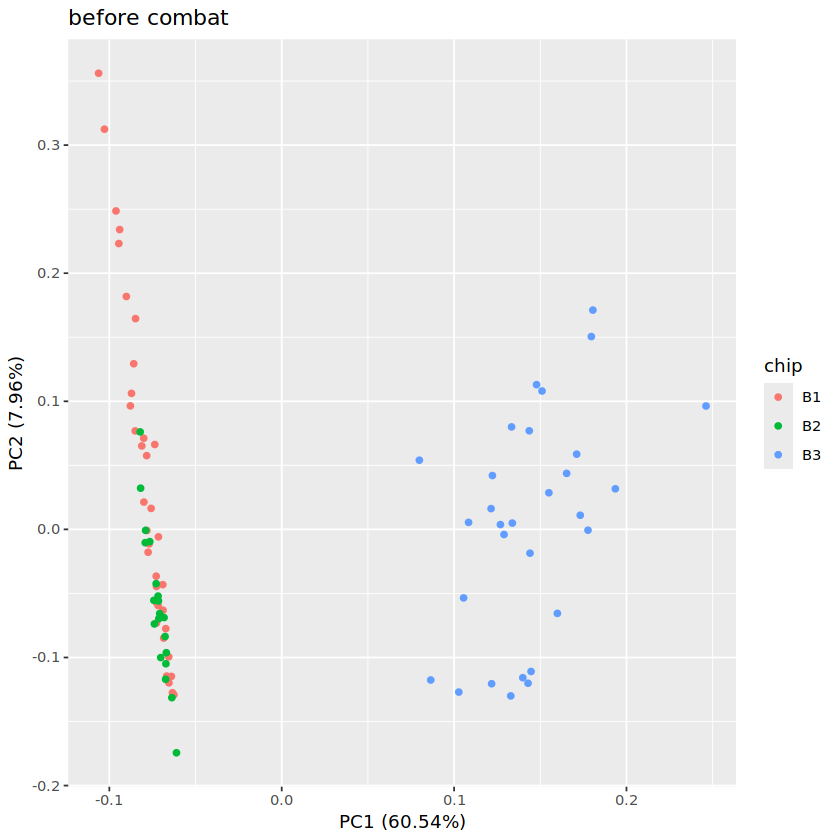

In [27]:
# #meta_pd_noout = meta_pd[meta_pd$Name!='MT106',]
# # Filter out an outlier? And why
# ClinicalInformation<-readRDS("ClinicalInformation_05_28.rds")
# pca_res <- prcomp(merged123_imp, scale. = TRUE)
# autoplot(pca_res, data = ClinicalInformation, colour = 'chip')+ggtitle('before combat')
# # Before PCA, scale the data so that large number would not dominate the variance
# #Do the pca

In [28]:
#merged123_imp_nooutlier_log = log2(merged123_imp_nooutlier+1)
merged123_imp_log=log2(merged123_imp+1)
#Common practice, since some of the data in the count matrix could involve 0, add 1 to avoid such information
merged123_imp_log_stand=prep.autoscale((merged123_imp_log),center=TRUE,scale=TRUE)
#merged_123_imp_norm = normalize.quantiles(as.matrix(t(merged123_imp_nooutlier)))
library(caret)
library(limma)
#ngenes*narrays
merged_123_imp_norm_vsn = normalizeVSN(as.matrix(t(merged123_imp))) 
# Said to be able to do the log and standardization itself


Loading required package: lattice

Registered S3 methods overwritten by 'caret':
  method        from    
  predict.plsda mdatools
  print.plsda   mdatools


Attaching package: ‘caret’


The following object is masked from ‘package:mdatools’:

    plsda



Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [ ]:
pheno = meta_pd
#edata = merged_123_imp_quantile
edata = merged_123_imp_norm_vsn
dim(edata)
#edata = merged_123_imp_norm_pqn
batch = pheno$Batch
mod = model.matrix(~as.factor(Group), data=pheno)
mod2 = model.matrix(~ as.factor(Group),
                      data = inter_pd_meta_comp2)

# reference-batch version, with covariates
combat_edata3_vsn = ComBat(dat=(edata), batch=batch, mod=mod, par.prior=TRUE)
#Use this one
# combat_edata3_vsn_alotmod = ComBat(dat=(edata),batch=batch,mod=NULL, par.prior=TRUE)
# saveRDS(t(combat_edata3_vsn),'/nfs/dcmb-lgarmire/johntao/cordblood/META_3BATCH_NOOUT_log_stand_vsn_COMBAT.RDS')
# saveRDS(t(combat_edata3_vsn_alotmod),'/nfs/dcmb-lgarmire/johntao/cordblood/tlytry_COMBAT_vsn_alotmod.rds')